In [4]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation

# Unzipping the dataset
zip_file_path = r"C:\Users\akalo\OneDrive\Desktop\Breast Cancer Classification\archive.zip"
unzip_dir = r"C:\Users\akalo\OneDrive\Desktop\Breast Cancer Classification\archive_unzipped"

# Extract dataset if not already extracted
if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

# Verify directories for dataset
train_dir = os.path.join(unzip_dir, "train")
val_dir = os.path.join(unzip_dir, "validation")
test_dir = os.path.join(unzip_dir, "test")

# Check if directories exist
if not (os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir)):
    raise FileNotFoundError("Dataset directories not found. Ensure the zip file contains 'train', 'validation', and 'test' folders.")

# Image data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    val_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    test_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Step 2: Define the CancerNet Model
def build_cancernet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_cancernet()

# Step 3: Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the Model
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=25,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

# Step 5: Evaluate the Model
eval_results = model.evaluate(test_gen)
print(f"\nTest Accuracy: {eval_results[1]:.2f}")

# Step 6: Confusion Matrix and Performance Metrics
predictions = (model.predict(test_gen) > 0.5).astype("int32")
y_true = test_gen.classes

cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, predictions, target_names=['Benign', 'Malignant']))

# Step 7: Visualize Training Progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Save the Model
model_path = os.path.join(unzip_dir, "CancerNet.h5")
model.save(model_path)
print(f"Model saved as {model_path}")


FileNotFoundError: Dataset directories not found. Ensure the zip file contains 'train', 'validation', and 'test' folders.

Found 85149 images belonging to 101 classes.
Found 21240 images belonging to 101 classes.
Epoch 1/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 676s 246ms/step - accuracy: 0.0071 - loss: -15201.9072 - val_accuracy: 0.0105 - val_loss: -152989.5469
Epoch 2/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 826s 310ms/step - accuracy: 0.0075 - loss: -184236.8906 - val_accuracy: 0.0079 - val_loss: -193429.2812
Epoch 3/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 878s 330ms/step - accuracy: 0.0083 - loss: -505147.9688 - val_accuracy: 0.0075 - val_loss: -919893.6250
Epoch 4/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 876s 329ms/step - accuracy: 0.0078 - loss: -955829.0000 - val_accuracy: 0.0071 - val_loss: -1606850.0000
Epoch 5/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 890s 334ms/step - accuracy: 0.0085 - loss: -1523720.8750 - val_accuracy: 0.0049 - val_loss: -2085853.2500
Epoch 6/25
2661/2661 ━━━━━━━━━━━━━━━━━━━━ 892s 335ms/step - accuracy: 0.0090 - loss: -2219109.7500 - val_accuracy: 0.0066 - val_loss: -3467850.2500
Epoch 7/25
2661/2661 ━━━━━━━━━

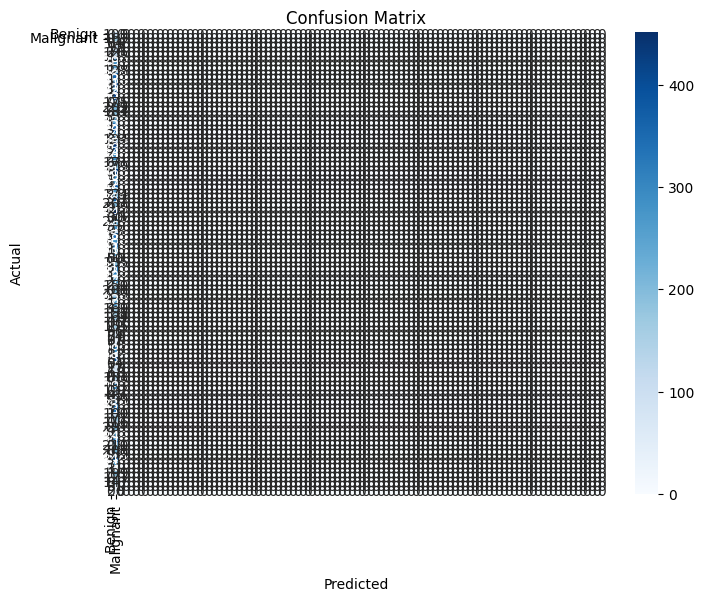


Classification Report:



ValueError: Number of classes, 101, does not match size of target_names, 2. Try specifying the labels parameter

In [6]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation

# Unzipping the dataset
zip_file_path = "C:\\Users\\akalo\\OneDrive\\Desktop\\Breast Cancer Classification\\archive.zip"
unzip_dir = "C:\\Users\\akalo\\OneDrive\\Desktop\\Breast Cancer Classification\\archive_unzipped"

if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

# Dataset directory (assumes all images are in a single folder)
data_dir = unzip_dir

# Image data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(50, 50),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 2: Define the CancerNet Model

def build_cancernet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = build_cancernet()

# Step 3: Compile the Model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the Model

history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=25,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

# Step 5: Evaluate the Model

print("\nEvaluating the model on validation data...")
eval_results = model.evaluate(val_gen)
print(f"\nValidation Accuracy: {eval_results[1]:.2f}")

# Step 6: Confusion Matrix and Performance Metrics

print("\nGenerating predictions and evaluation metrics...")
predictions = (model.predict(val_gen) > 0.5).astype("int32")
y_true = val_gen.classes

cm = confusion_matrix(y_true, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, predictions, target_names=['Benign', 'Malignant']))

# Step 7: Visualize Training Progress

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Save the Model

model.save("CancerNet.h5")
print("Model saved as CancerNet.h5")
